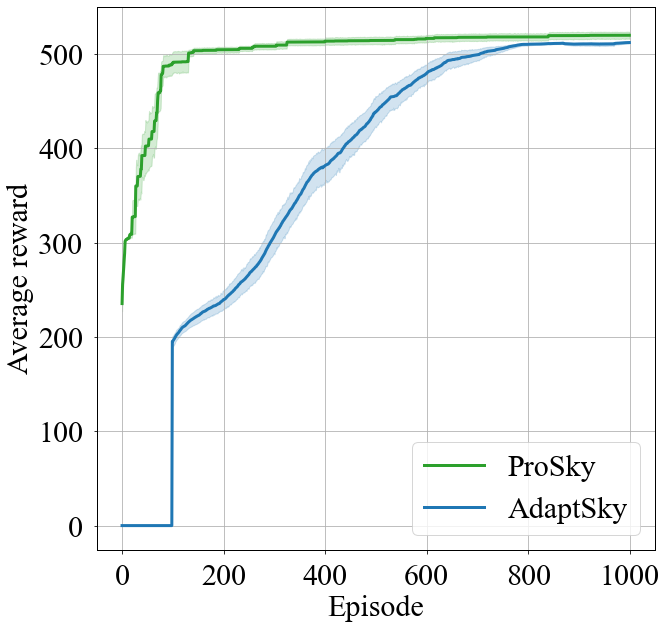

In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import pickle 
import warnings

warnings.filterwarnings("ignore")  
mpl.rcParams['axes.linewidth'] = 1
plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams["font.family"] = "Times New Roman"
plt.tick_params(axis='both', which='major', pad=10)
marker_style = dict(linestyle='-', color="tab:green", linewidth=3, fillstyle='none', clip_on=False)
marker_style2 = dict(linestyle='-', color="tab:blue", linewidth=3, fillstyle='none', clip_on=False)

ITERATIONS = 10
x = []
x_2 = []
NEAT_FITNESS = []
DRL_REWARDS = []

for iteration in range(ITERATIONS):
        try:
            Start_Reading = f"Pickles/NEAT/NEAT-best_fitness-r=2.5,different-channel-conditions-SUM-RATE-{iteration+1}.pickle"
            with open(Start_Reading, "rb") as f:
                x.extend(list(range(0, 1000)))
                NEAT_FITNESS.extend(pickle.load(f))
        except:
            pass
        
        try:
            Start_Reading = f"Pickles/AdaptSky/AdaptSky-r=2.5,different-channel-conditions-moving_avg_rewards-{iteration+1}.pickle"
            with open(Start_Reading, "rb") as f:
                x_2.extend(list(range(0, 1000)))
                DRL_REWARDS.extend(pickle.load(f))
        except:
            pass

plt.xlabel('Episode')
plt.ylabel('Average reward')
plt.grid()

ax = sns.lineplot(x_2, NEAT_FITNESS, **marker_style, ci=68.2, label='ProSky')
ax = sns.lineplot(x, DRL_REWARDS, **marker_style2, ci=68.2, label='AdaptSky')

plt.savefig(f'Figures/AdaptSky-VS-DRL.pdf', bbox_inches = 'tight')
plt.show()

In [90]:
done_DRL = True
done_NEAT = True

j = 0

average_d = []
average_n = []

for i in [999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999, 9999]:
    average_d.append(DRL_REWARDS[i])
    average_n.append(NEAT_FITNESS[i])

print(np.average(average_d))
print(np.average(average_n))

512.1948
519.8933263082017
